In [45]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.simplefilter("ignore")

In [46]:
df = pd.read_csv(r"C:\Users\SHRI\OneDrive\Desktop\DataScience_DataFiles\srk_sir_datasets\Mall_Customers.csv")
df


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [47]:
df.rename(columns = {"Annual Income (k$)": "Income",
          "Spending Score (1-100)": "Score"}, inplace = True)
df

,CustomerID,Genre,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [48]:
df.isnull().sum()

CustomerID    0
Genre         0
Age           0
Income        0
Score         0
dtype: int64

In [49]:
# no need to delete this 
# deleted here only for understanding purpose

df.drop(columns = ["CustomerID", "Genre", "Age"], inplace = True)

In [50]:
df

,Income,Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


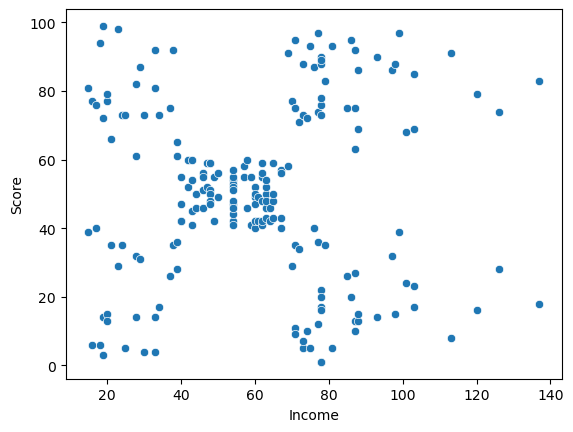

In [51]:
sns.scatterplot(x = 'Income', y = "Score", data = df)
plt.show()

In [52]:
X = df

In [53]:
# this output all k values k = 1, k = 2 as we put what is wcss for that it will showing
wcss = []

for k in range(1,11):
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters = k, init = "k-means++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

print(wcss)

[269981.28, 181363.59595959596, 106348.37306211119, 73679.78903948834, 44454.47647967974, 38797.9027638142, 30227.606513152015, 29422.930846842282, 26205.40405989286, 19779.014121222186]


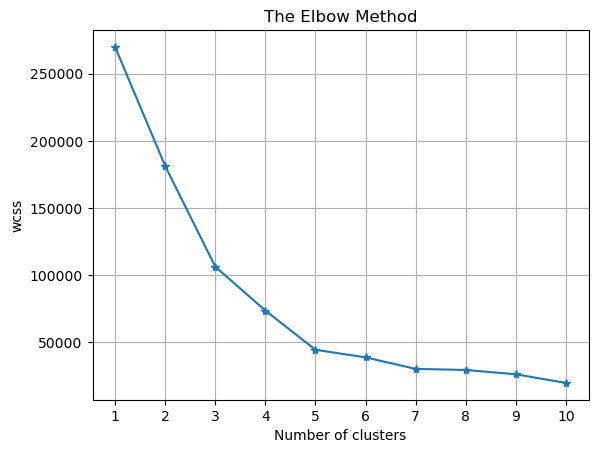

In [54]:
plt.plot(range(1,11), wcss, marker = "*")
plt.xticks(range(1,11))
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.grid()
plt.show()

In [55]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters = k, init = "k-means++", random_state = True)

#fit and predict

X["km_cluster"] = kmeans.fit_predict(X)

In [56]:

kmeans.cluster_centers_



array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

<Axes: xlabel='Income', ylabel='Score'>

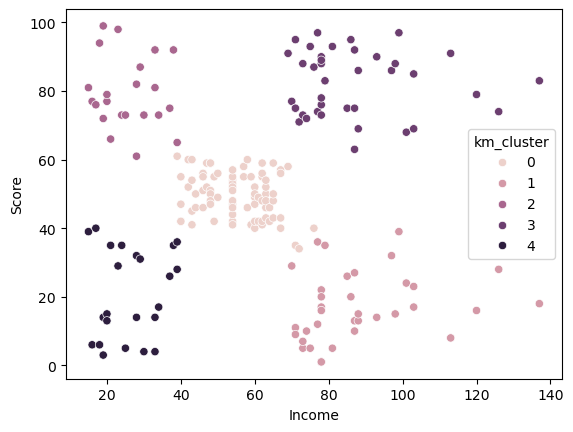

In [57]:
sns.scatterplot(x = "Income", y = "Score", hue = "km_cluster", data = df)

# Hierarchical clustering
- identifying the optimal number of clusters using dendogram

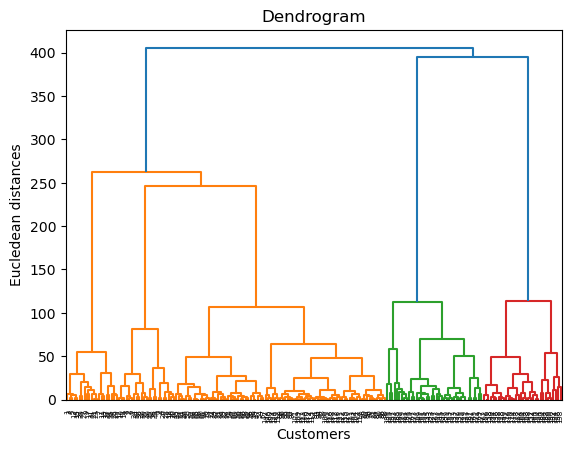

In [58]:
import scipy.cluster.hierarchy as sch

data = sch.linkage(X, method = 'ward')

dendrogram = sch.dendrogram(data)

plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Eucledean distances")
plt.show()

hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
labels = hc.fit_predict(X)


# DBSCAN CLUSTERING

In [59]:
from sklearn.cluster import DBSCAN

for r in range(1,11):
    for m in range(3,10):
        dbs = DBSCAN(eps = r, min_samples = m)
        X["db_cluster"] = dbs.fit_predict(X)
        
    if X["db_cluster"].nunique()==5:
        break

print("eps : ",r)
print("min :", m)


eps :  8
min : 9


In [60]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = True)
df["km_cluster"] = kmeans.fit_predict(X)
df["km_cluster"] 

0      4
1      2
2      4
3      2
4      4
      ..
195    3
196    1
197    3
198    1
199    3
Name: km_cluster, Length: 200, dtype: int32

In [61]:
dbs = DBSCAN(eps = 8, min_samples = 9)
X["db_cluster"] = dbs.fit_predict(X)
dbs.fit_predict(X)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  3, -1,  1,  0,  3,  2,  1,  2,  1,  0,  1,  2,  3,
        2,  1,  2,  1,  2,  3, -1,  3,  2,  3, -1,  1, -1,  3, -1,  3, -1,
        1, -1,  3,  2,  1,  2,  1, -1,  1,  2,  3, -1,  1, -1,  3, -1, -1,
       -1, -1, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [62]:
df

,Income,Score,km_cluster,db_cluster
0,15,39,4,-1
1,15,81,2,-1
2,16,6,4,-1
3,16,77,2,-1
4,17,40,4,-1
...,...,...,...,...
195,120,79,3,-1
196,126,28,1,-1
197,126,74,3,-1
198,137,18,1,-1


In [63]:
X["db_cluster"].nunique()

5

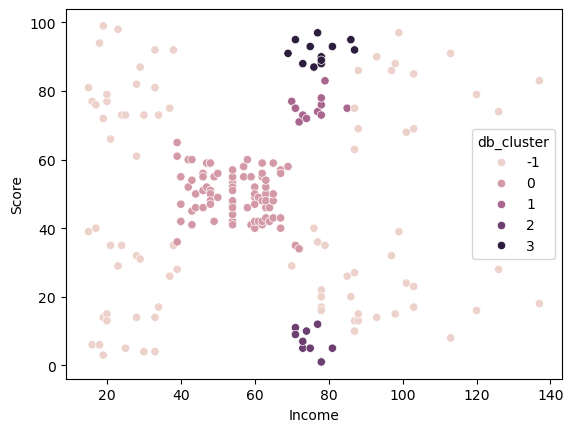

In [64]:
sns.scatterplot(x = "Income", y = "Score", hue = "db_cluster", data = X)
plt.show()

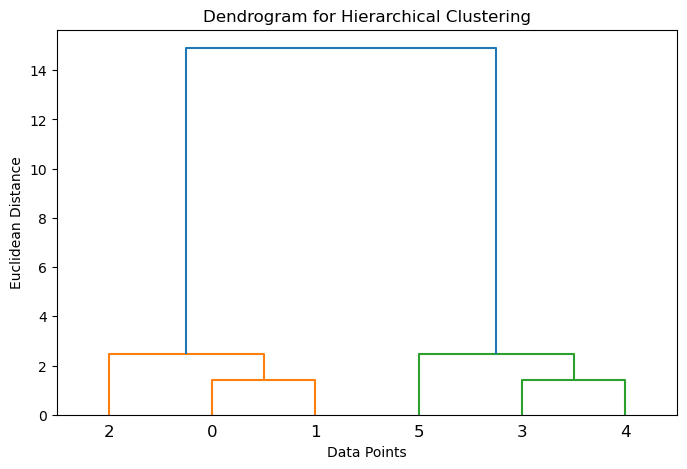

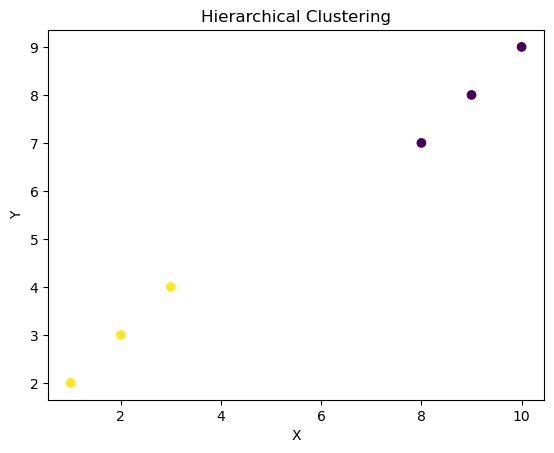

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Step 1: Define the dataset
X = np.array([[1, 2], [2, 3], [3, 4], [8, 7], [9, 8], [10, 9]])

# Step 2: Plot the Dendrogram
plt.figure(figsize=(8, 5))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

# Step 3: Apply Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
labels = hc.fit_predict(X)

# Step 4: Plot Clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
plt.title("Hierarchical Clustering")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
